In [1]:
%matplotlib inline
import pandas as pd

from plotnine import options
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [2]:
# geting data for all of Canada
total_data = pd.read_csv('https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv')

total_data.head()

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,2020-01-31,NaN,3,0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,2020-01-31,NaN,1,0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,2020-01-31,NaN,4,0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,2020-02-08,NaN,3,0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,2020-02-08,NaN,4,0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# extracing only data on Ontario
ontario_filter = total_data['prname'] == 'Ontario'
ontario_data1 = total_data.loc[ontario_filter, :]

ontario_data1.head()

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,2020-01-31,NaN,3,0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,2020-02-08,NaN,3,0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,35,Ontario,Ontario,2020-02-16,NaN,3,0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,35,Ontario,Ontario,2020-02-21,NaN,3,0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,35,Ontario,Ontario,2020-02-24,NaN,4,0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


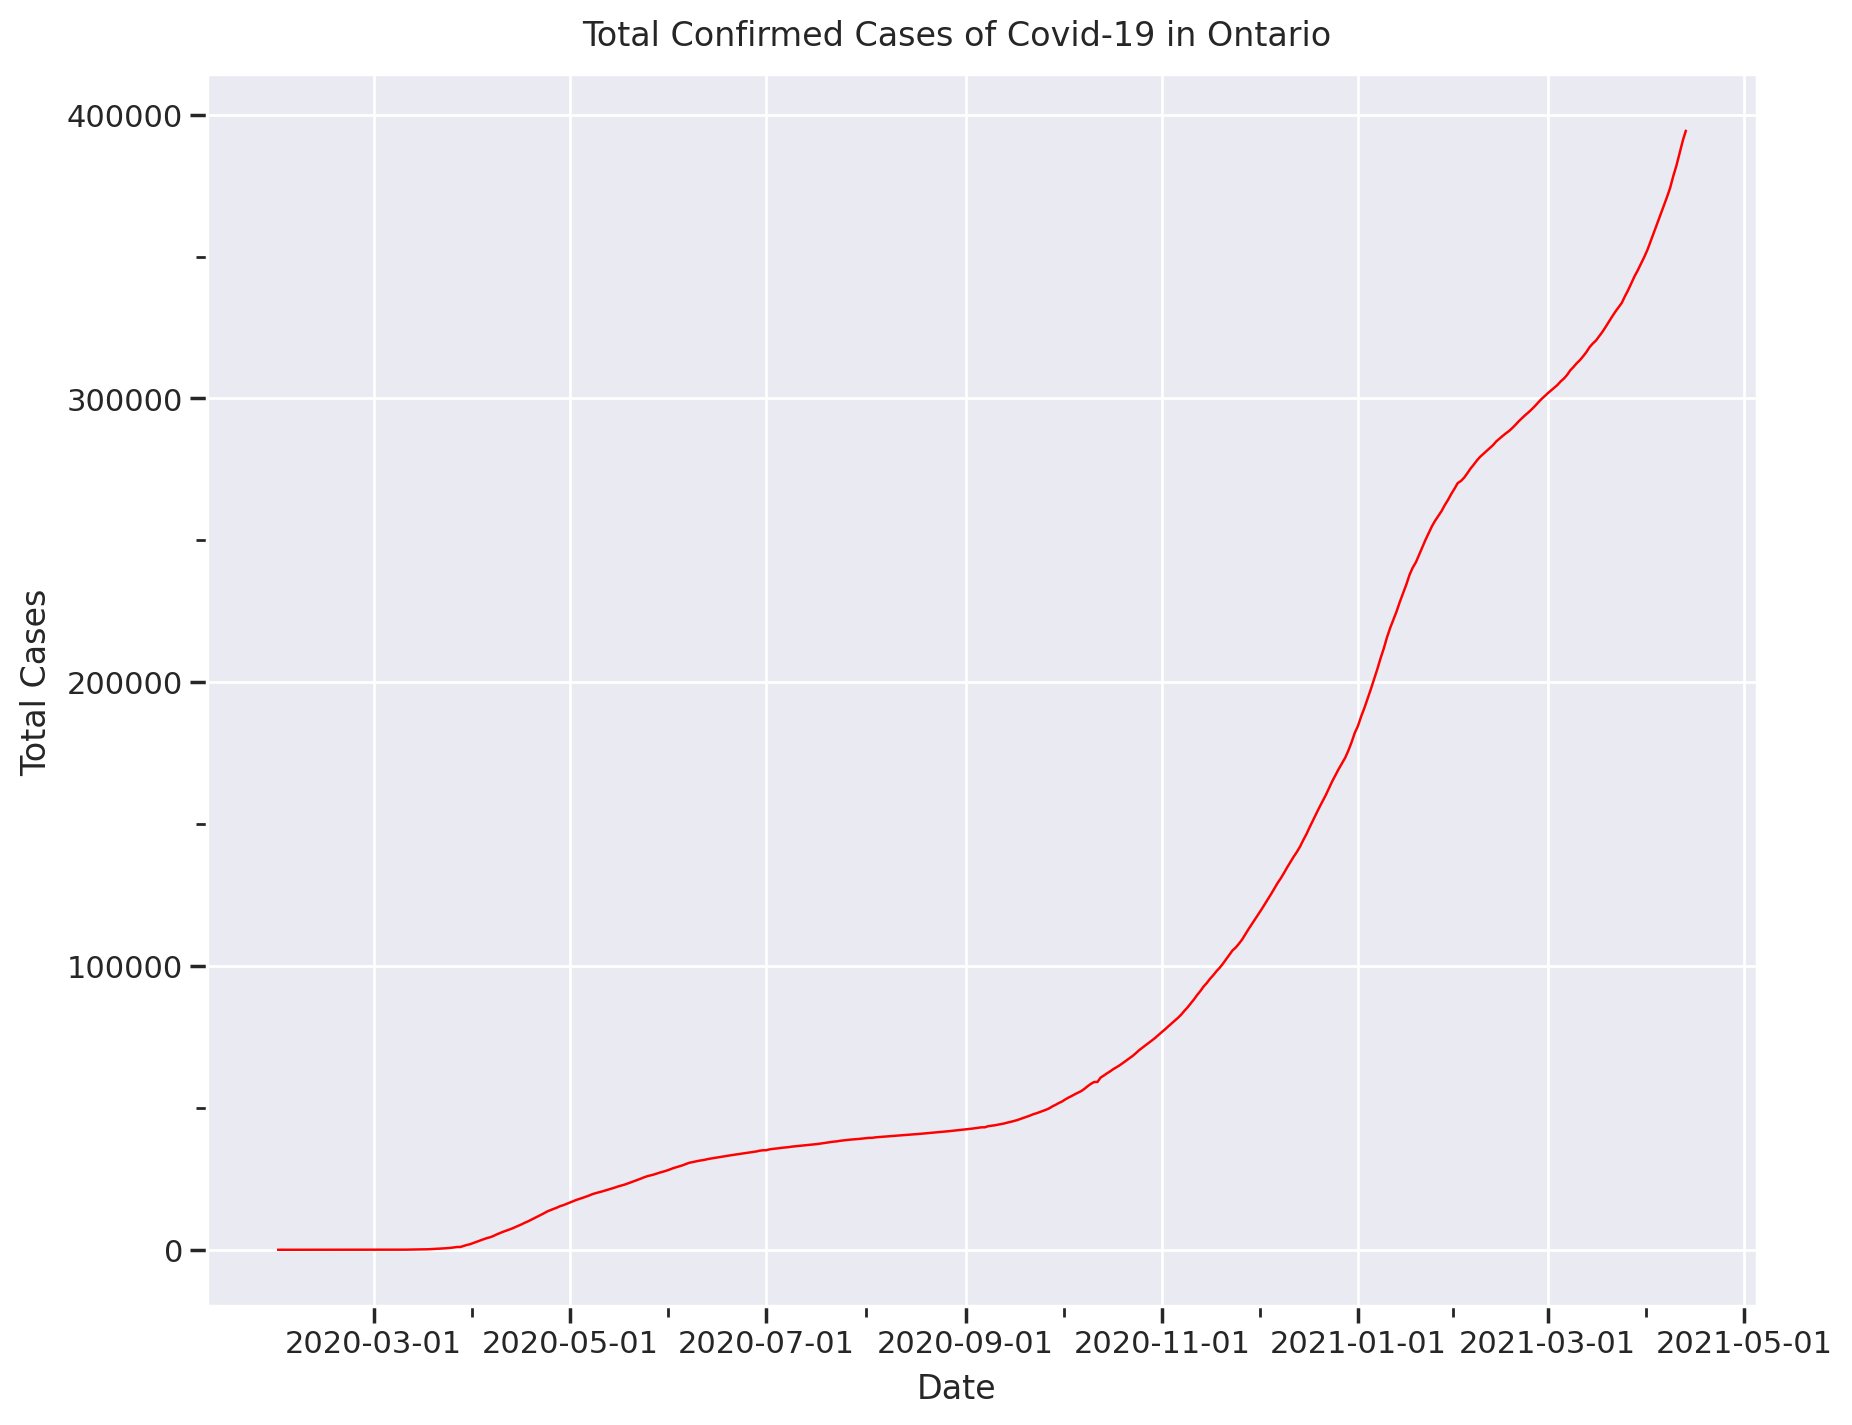

In [4]:
# plotting total cases
%config InlineBackend.figure_format = 'retina'
options.figure_size = (10, 8)
theme_set(theme_seaborn())

(ggplot(data=ontario_data1, mapping=aes(x='date', y='numtotal', group=1))
 + scale_x_datetime(breaks=date_breaks('2 months'))
 + geom_line(color='red')
 + labs(title='Total Confirmed Cases of Covid-19 in Ontario', x='Date', y='Total Cases')

).draw();

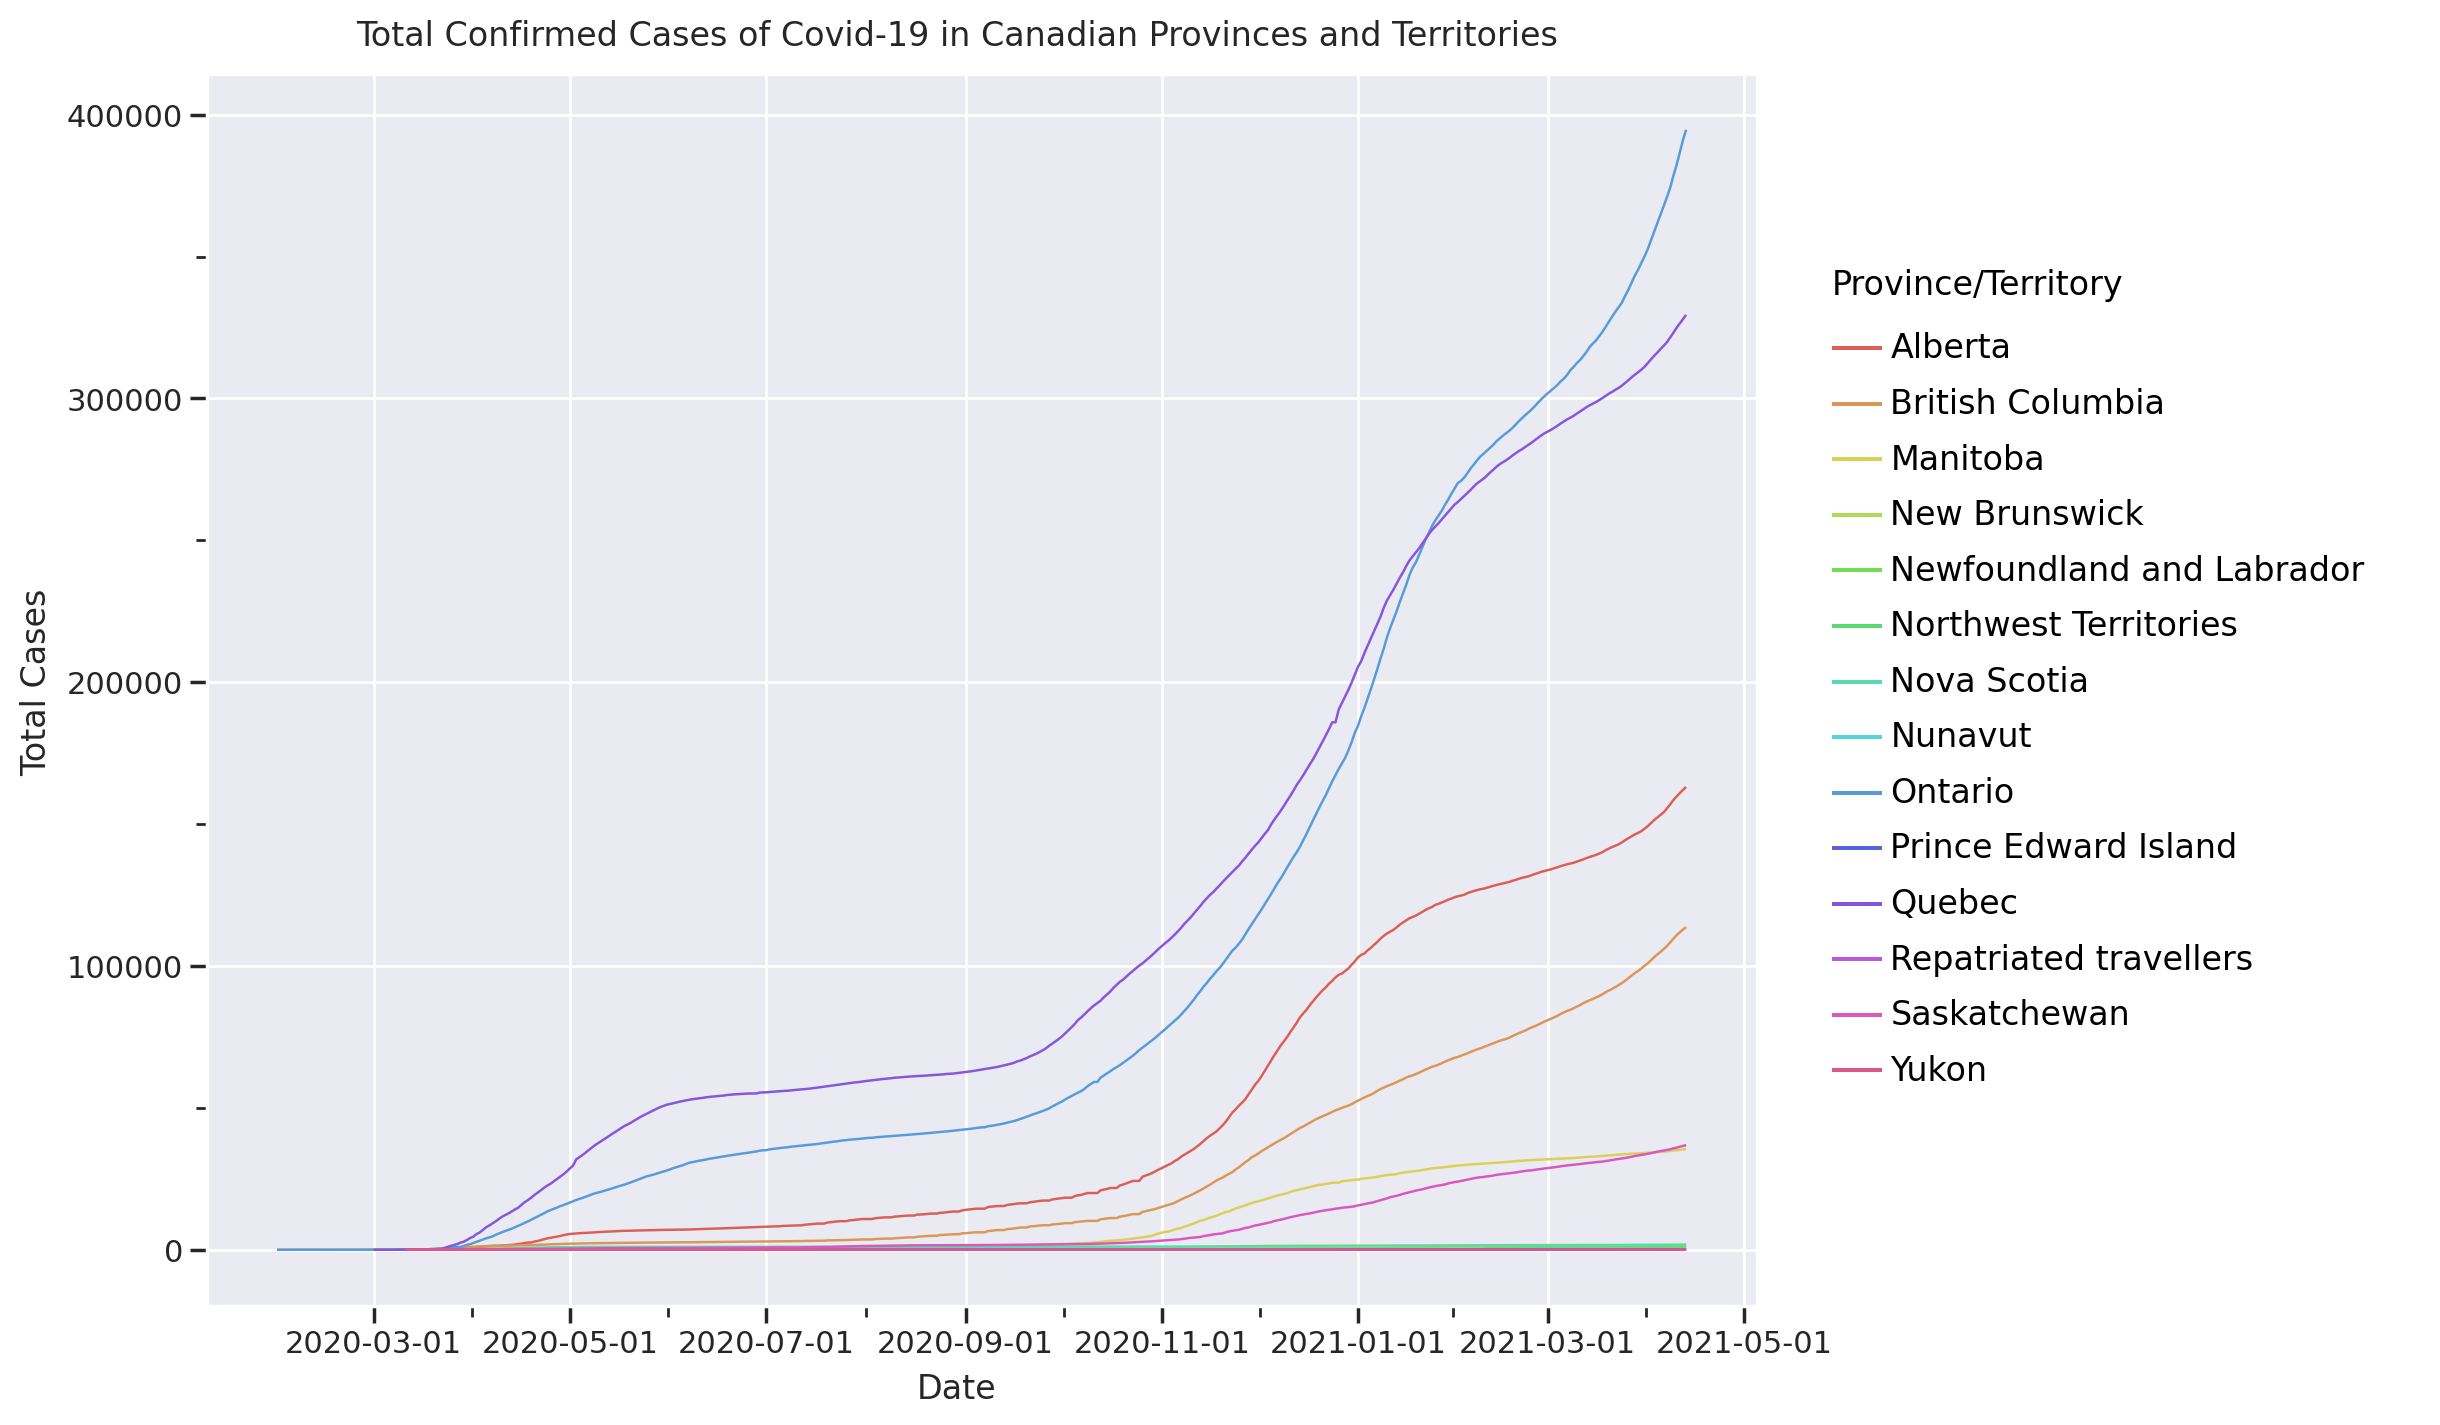

In [5]:
# comparing between provinces

total_data_trim = total_data[total_data.prname != 'Canada']

(ggplot(data=total_data_trim, mapping=aes(x='date', y='numtotal', color='prname', group='prname'))
 + scale_x_datetime(breaks=date_breaks('2 months'))
 + geom_line()
 + labs(
     title='Total Confirmed Cases of Covid-19 in Canadian Provinces and Territories', 
     x='Date', 
     y='Total Cases', 
     color='Province/Territory'
 )
).draw();

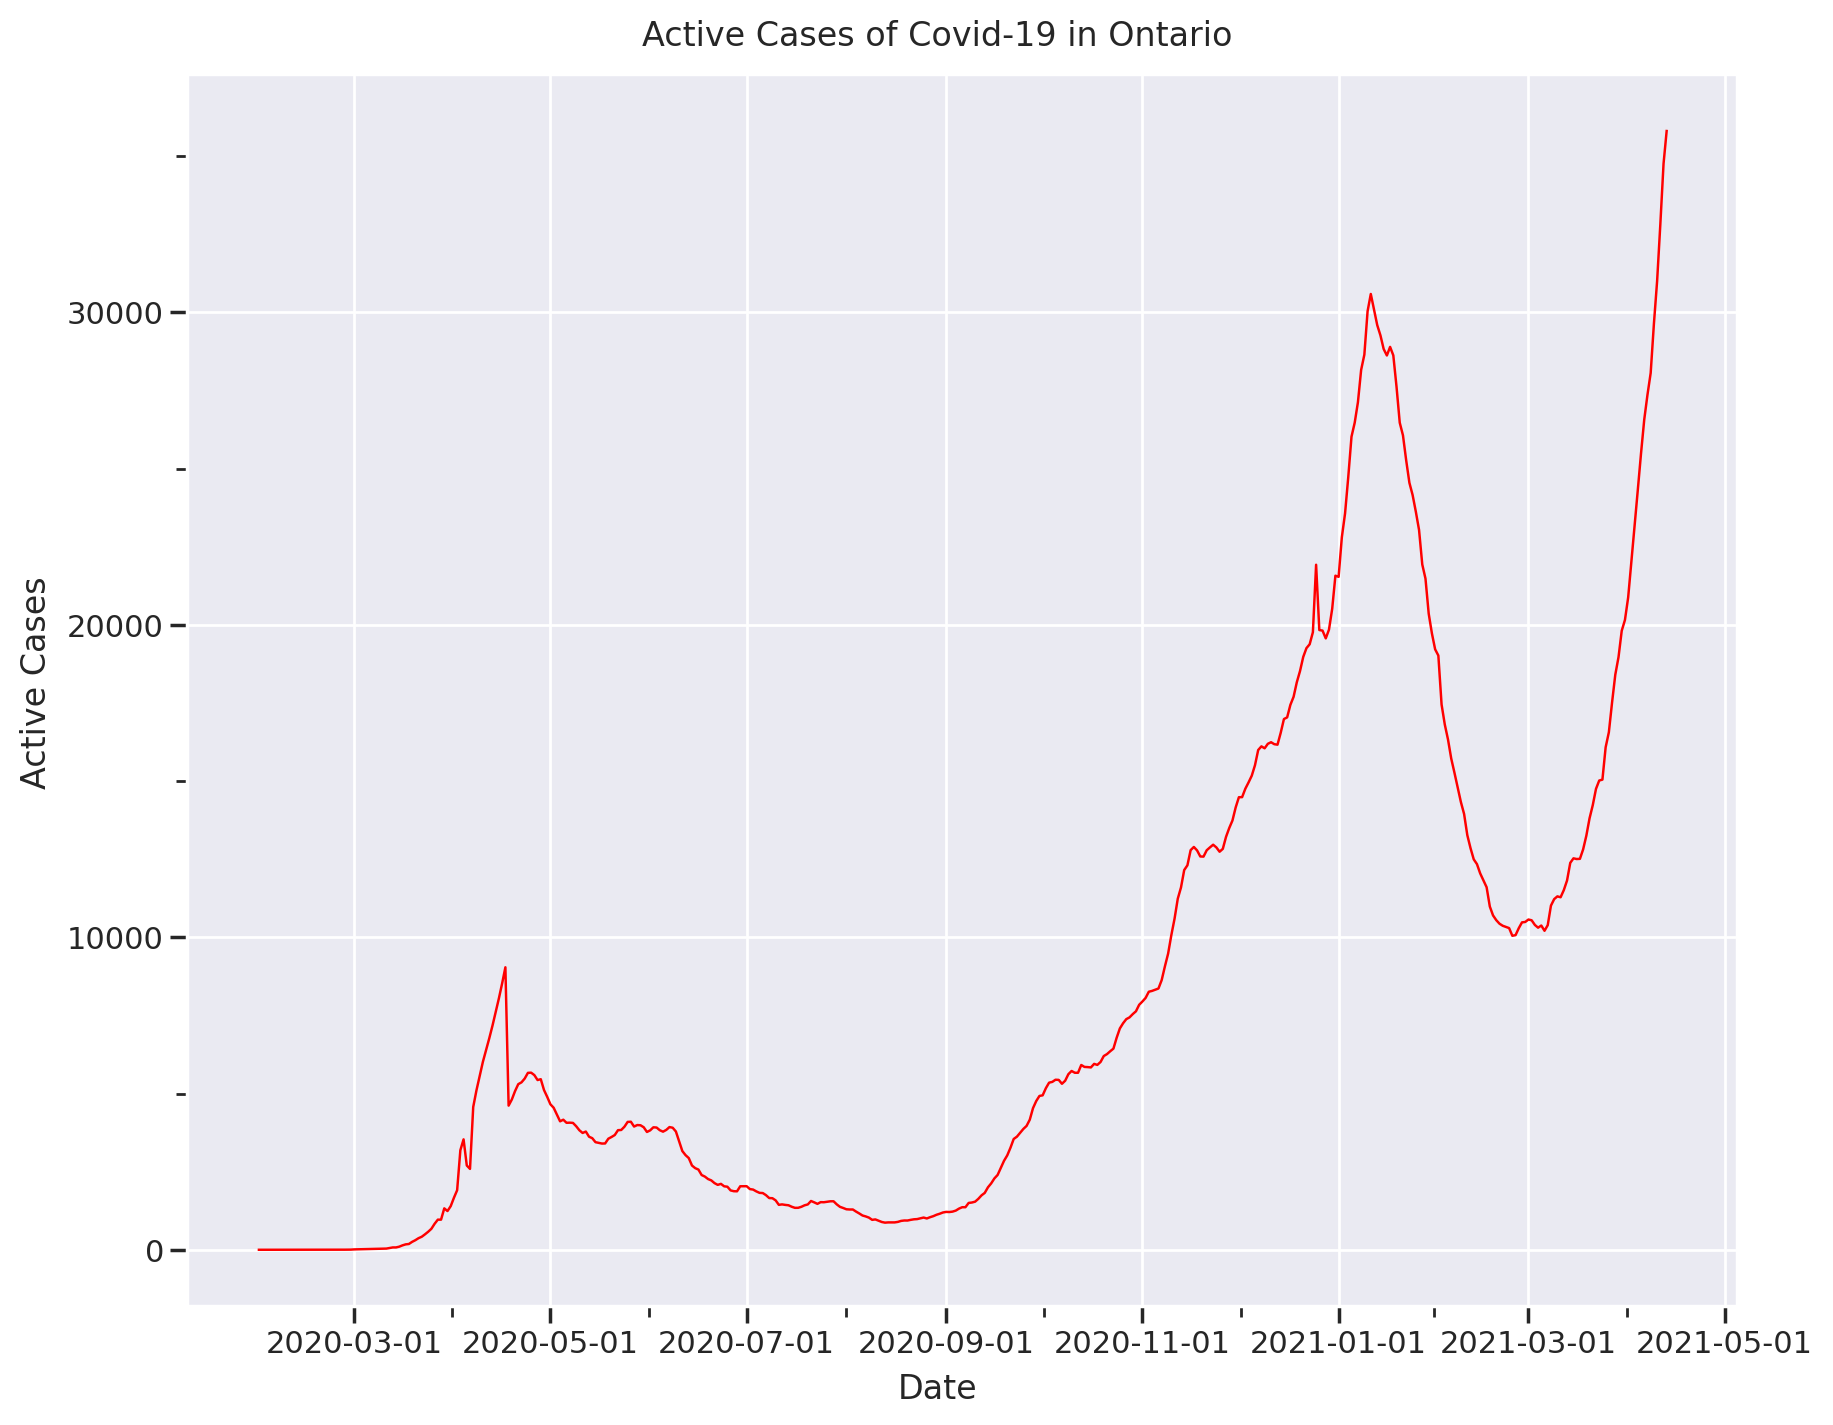

In [6]:
# plotting active cases
(ggplot(data=ontario_data1, mapping=aes(x='date', y='numactive', group=1))
 + scale_x_datetime(breaks=date_breaks('2 months'))
 + geom_line(color='red')
 + labs(title='Active Cases of Covid-19 in Ontario', x='Date', y='Active Cases')

).draw();

In [7]:
# extracting number of hospitalized, ICU, ventilated
ontario_data2 = pd.read_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv')

hospital_data = ontario_data2[['Reported Date', 'Number of patients hospitalized with COVID-19', 'Number of patients in ICU due to COVID-19', 'Number of patients in ICU on a ventilator due to COVID-19']]

#patients_hospitalized = ontario_data2['Number of patients hospitalized with COVID-19'].values
#patients_icu = ontario_data2['Number of patients in ICU due to COVID-19'].values
#patients_icu_vent = ontario_data2['Number of patients in ICU on a ventilator due to COVID-19'].values

ontario_data2.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,...,Number of patients in ICU on a ventilator due to COVID-19,Num. of patients in ICU on a ventilator testing positive,Num. of patients in ICU on a ventilator testing negative,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths,Total_Lineage_B.1.1.7,Total_Lineage_B.1.351,Total_Lineage_P.1
0,2020-01-26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-28,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-30,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-31,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
